In [9]:

# CÉLULA 1: IMPORTAÇÕES E DEFINIÇÕES DE FUNÇÕES

import random
import numpy as np
import matplotlib.pyplot as plt

GANHOS = [92, 4, 43, 83, 84, 68, 92, 82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]
PESOS = [44, 46, 90, 72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]
CAPACIDADE_MAXIMA = 878
DIMENSOES = 20

def knapsack(solution):
    assert len(solution) == DIMENSOES, "A solução deve ter exatamente 20 dimensões."

    ganho_total = 0
    peso_total = 0

    for i in range(len(solution)):
        if solution[i] == 1:
            ganho_total += GANHOS[i]
            peso_total += PESOS[i]

    eh_valido = peso_total <= CAPACIDADE_MAXIMA

    if not eh_valido:
        ganho_total = 0

    return ganho_total, peso_total, eh_valido


def calcular_fitness(individuo):
    ganho, _, _ = knapsack(individuo)
    return ganho

def inicializar_populacao(tamanho_pop, dimensoes):
    populacao = []
    for _ in range(tamanho_pop):
        individuo = [random.randint(0, 1) for _ in range(dimensoes)]
        populacao.append(individuo)
    return populacao

def selecao_torneio(populacao_com_fitness, tamanho_torneio=3):
    competidores = random.sample(populacao_com_fitness, tamanho_torneio)
    competidores.sort(key=lambda x: x[1], reverse=True)
    return competidores[0][0]

def crossover_um_ponto(pai1, pai2):
    ponto = random.randint(1, len(pai1) - 2)
    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]
    return filho1, filho2

def crossover_dois_pontos(pai1, pai2):
    ponto1 = random.randint(1, len(pai1) - 2)
    ponto2 = random.randint(1, len(pai1) - 2)
    if ponto1 > ponto2:
        ponto1, ponto2 = ponto2, ponto1
    elif ponto1 == ponto2:
        return crossover_um_ponto(pai1, pai2)
    filho1 = pai1[:ponto1] + pai2[ponto1:ponto2] + pai1[ponto2:]
    filho2 = pai2[:ponto1] + pai1[ponto1:ponto2] + pai2[ponto2:]
    return filho1, filho2

def crossover_uniforme(pai1, pai2):
    filho1 = []
    filho2 = []
    for i in range(len(pai1)):
        if random.random() < 0.5:
            filho1.append(pai1[i])
            filho2.append(pai2[i])
        else:
            filho1.append(pai2[i])
            filho2.append(pai1[i])
    return filho1, filho2

def mutacao_bit_flip(individuo, taxa_mutacao=0.02):
    individuo_mutado = individuo.copy()
    for i in range(len(individuo_mutado)):
        if random.random() < taxa_mutacao:
            individuo_mutado[i] = 1 - individuo_mutado[i]
    return individuo_mutado

def executar_ag(tipo_crossover,
                 geracoes=500,
                 tam_pop=50,
                 tam_torneio=3,
                 taxa_crossover=0.8,
                 taxa_mutacao=0.02,
                 elitismo=2):

    populacao = inicializar_populacao(tam_pop, DIMENSOES)
    melhor_fitness_por_geracao = []

    for _ in range(geracoes):
        pop_com_fitness = []
        for ind in populacao:
            fitness = calcular_fitness(ind)
            pop_com_fitness.append((ind, fitness))

        pop_com_fitness.sort(key=lambda x: x[1], reverse=True)
        melhor_fitness_por_geracao.append(pop_com_fitness[0][1])

        nova_populacao = []
        for i in range(elitismo):
            nova_populacao.append(pop_com_fitness[i][0])

        while len(nova_populacao) < tam_pop:
            pai1 = selecao_torneio(pop_com_fitness, tam_torneio)
            pai2 = selecao_torneio(pop_com_fitness, tam_torneio)

            filho1, filho2 = pai1, pai2
            if random.random() < taxa_crossover:
                if tipo_crossover == 'um_ponto':
                    filho1, filho2 = crossover_um_ponto(pai1, pai2)
                elif tipo_crossover == 'dois_pontos':
                    filho1, filho2 = crossover_dois_pontos(pai1, pai2)
                elif tipo_crossover == 'uniforme':
                    filho1, filho2 = crossover_uniforme(pai1, pai2)

            nova_populacao.append(mutacao_bit_flip(filho1, taxa_mutacao))
            if len(nova_populacao) < tam_pop:
                nova_populacao.append(mutacao_bit_flip(filho2, taxa_mutacao))

        populacao = nova_populacao

    pop_final_com_fitness = [(ind, calcular_fitness(ind)) for ind in populacao]
    pop_final_com_fitness.sort(key=lambda x: x[1], reverse=True)

    fitness_final = pop_final_com_fitness[0][1]
    melhor_individuo_final = pop_final_com_fitness[0][0]

    return fitness_final, melhor_fitness_por_geracao, melhor_individuo_final

print("Célula 1 executada: Funções carregadas com sucesso.")

Célula 1 executada: Funções carregadas com sucesso.


In [10]:
#EXECUÇÃO DO EXPERIMENTO (AGs)

N_EXECUCOES = 30
tipos_de_crossover = ['um_ponto', 'dois_pontos', 'uniforme']

resultados = {}

for crossover in tipos_de_crossover:
    print(f"--- Iniciando 30 execuções para Crossover: {crossover} ---")

    resultados_finais = []
    historicos_convergencia = []

    for i in range(N_EXECUCOES):
        print(f"Execução {i+1}/{N_EXECUCOES}...")

        fitness_final, historico, _ = executar_ag(tipo_crossover=crossover)

        resultados_finais.append(fitness_final)
        historicos_convergencia.append(historico)

    resultados[crossover] = {
        'finais': resultados_finais,
        'convergencia': historicos_convergencia
    }
    print(f"--- Concluído para Crossover: {crossover} ---")


print("\n--- EXPERIMENTO DOS AGs CONCLUÍDO ---")


--- Iniciando 30 execuções para Crossover: um_ponto ---
Execução 1/30...
Execução 2/30...
Execução 3/30...
Execução 4/30...
Execução 5/30...
Execução 6/30...
Execução 7/30...
Execução 8/30...
Execução 9/30...
Execução 10/30...
Execução 11/30...
Execução 12/30...
Execução 13/30...
Execução 14/30...
Execução 15/30...
Execução 16/30...
Execução 17/30...
Execução 18/30...
Execução 19/30...
Execução 20/30...
Execução 21/30...
Execução 22/30...
Execução 23/30...
Execução 24/30...
Execução 25/30...
Execução 26/30...
Execução 27/30...
Execução 28/30...
Execução 29/30...
Execução 30/30...
--- Concluído para Crossover: um_ponto ---
--- Iniciando 30 execuções para Crossover: dois_pontos ---
Execução 1/30...
Execução 2/30...
Execução 3/30...
Execução 4/30...
Execução 5/30...
Execução 6/30...
Execução 7/30...
Execução 8/30...
Execução 9/30...
Execução 10/30...
Execução 11/30...
Execução 12/30...
Execução 13/30...
Execução 14/30...
Execução 15/30...
Execução 16/30...
Execução 17/30...
Execução 18/30

In [11]:
#DADOS DA ATIVIDADE 3 E ANÁLISE DE MÉTRICAS

hc_tradicional_finais = [924, 964, 997, 1019, 1021, 1042, 994, 1031, 970, 1037, 1013, 1037, 1024, 1037, 1037, 1007, 941, 986, 1037, 1037, 1042, 1024, 1031, 938, 964, 1037, 1017, 993, 1037, 1030]
hc_estocastico_finais = [967, 952, 822, 914, 901, 914, 853, 958, 871, 886, 940, 835, 935, 877, 769, 798, 960, 744, 832, 843, 751, 797, 859, 796, 971, 866, 862, 853, 878, 904]


print("\n--- MÉDIA E DESVIO PADRÃO (FITNESS FINAL) ---")

for crossover, data in resultados.items():
    media = np.mean(data['finais'])
    desvio_padrao = np.std(data['finais'])
    melhor_absoluto = np.max(data['finais'])
    print(f"Crossover: {crossover}")
    print(f"  Média: {media:.2f}")
    print(f"  Desvio Padrão: {desvio_padrao:.2f}")
    print(f"  Melhor Absoluto: {melhor_absoluto}")

# Dados dos HCs
print(f"HC Tradicional:")
print(f"  Média: {np.mean(hc_tradicional_finais):.2f}")
print(f"  Desvio Padrão: {np.std(hc_tradicional_finais):.2f}")
print(f"  Melhor Absoluto: {np.max(hc_tradicional_finais)}")

print(f"HC Estocástico:")
print(f"  Média: {np.mean(hc_estocastico_finais):.2f}")
print(f"  Desvio Padrão: {np.std(hc_estocastico_finais):.2f}")
print(f"  Melhor Absoluto: {np.max(hc_estocastico_finais)}")


--- MÉDIA E DESVIO PADRÃO (FITNESS FINAL) ---
Crossover: um_ponto
  Média: 1037.83
  Desvio Padrão: 4.30
  Melhor Absoluto: 1042
Crossover: dois_pontos
  Média: 1038.17
  Desvio Padrão: 3.80
  Melhor Absoluto: 1042
Crossover: uniforme
  Média: 1039.50
  Desvio Padrão: 2.50
  Melhor Absoluto: 1042
HC Tradicional:
  Média: 1008.93
  Desvio Padrão: 33.79
  Melhor Absoluto: 1042
HC Estocástico:
  Média: 870.27
  Desvio Padrão: 63.34
  Melhor Absoluto: 971


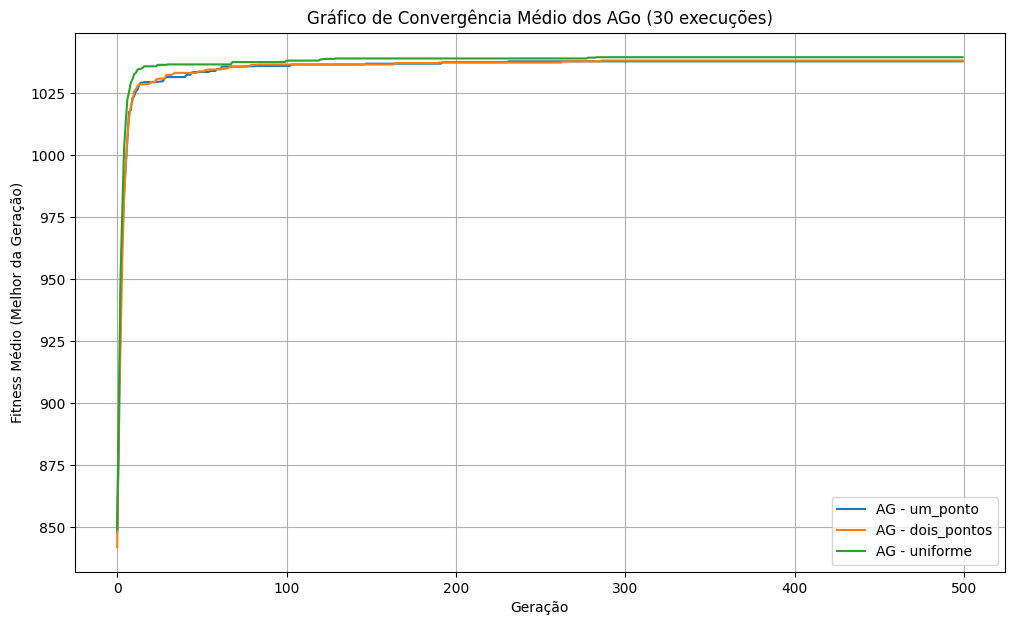

In [12]:

#GRÁFICO DE CONVERGENCIA (AGs)



plt.figure(figsize=(12, 7))
plt.title('Gráfico de Convergência Médio dos AGo (30 execuções)')
plt.xlabel('Geração')
plt.ylabel('Fitness Médio (Melhor da Geração)')

# Itera sobre os resultados do AG guardados na Célula 2
for crossover, data in resultados.items():
    # Calcula a média de convergência (média das 30 listas de histórico)
    media_convergencia = np.mean(data['convergencia'], axis=0)
    plt.plot(media_convergencia, label=f'AG - {crossover}')

plt.legend()
plt.grid(True)

plt.show()

/tmp/ipython-input-154958358.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_boxplot, labels=labels_boxplot)


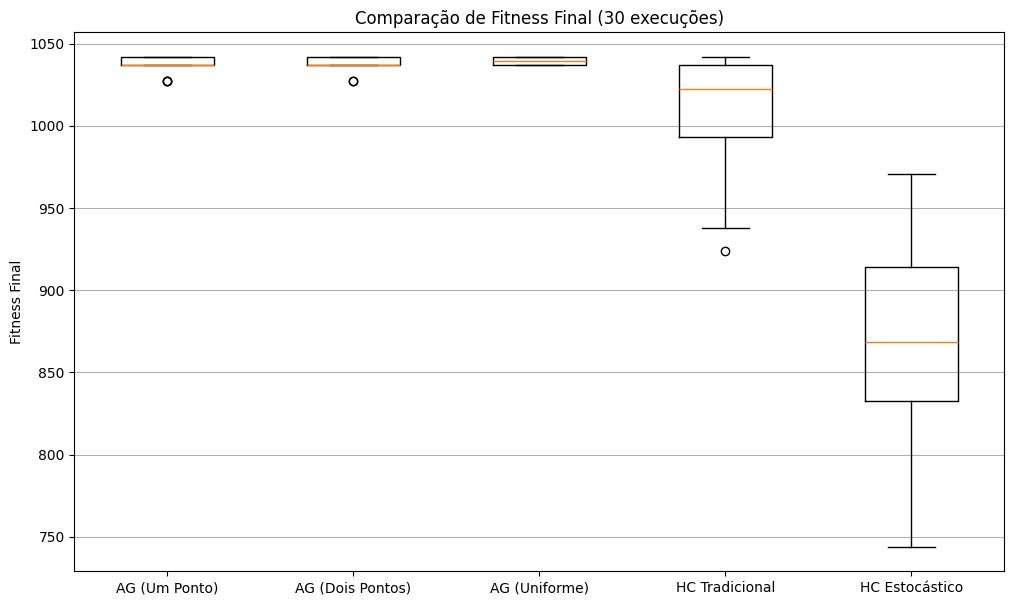

In [13]:

# GRÁFICO BOXPLOT (Comparativo AGs vs HCs)
plt.figure(figsize=(12, 7))
plt.title('Comparação de Fitness Final (30 execuções)')

dados_boxplot = [
    resultados['um_ponto']['finais'],
    resultados['dois_pontos']['finais'],
    resultados['uniforme']['finais'],
    hc_tradicional_finais,
    hc_estocastico_finais
]
labels_boxplot = [
    'AG (Um Ponto)',
    'AG (Dois Pontos)',
    'AG (Uniforme)',
    'HC Tradicional',
    'HC Estocástico'
]

plt.boxplot(dados_boxplot, labels=labels_boxplot)
plt.ylabel('Fitness Final')
plt.grid(True, axis='y')

plt.show()